In [60]:
import pandas as pd
## read csv files
movies_file_path = '/Users/akshandua/Downloads/ml-20m/movies.csv'
ratings_file_path = '/Users/akshandua/Downloads/ml-20m/ratings.csv'

movies_df = pd.read_csv(movies_file_path)
ratings_df = pd.read_csv(ratings_file_path)

## print columns
print(movies_df.columns)
print(ratings_df.columns)

## print lenth
print(len(movies_df))
print(len(ratings_df))

## fix genres and one hot encode
genres_oneHotEncode = movies_df['genres'].str.get_dummies(sep='|')

## add to one hot encoding back to movies
movies_with_genres_df = pd.concat([movies_df, genres_oneHotEncode], axis=1)

movies_with_genres_df = movies_with_genres_df.rename(columns={'(no genres listed)': 'Others'})

others_column = movies_with_genres_df.pop('Others')
movies_with_genres_df['Others'] = others_column

print(movies_with_genres_df.columns)


## merge movies into ratings

combined_df = pd.merge(ratings_df, movies_with_genres_df, on='movieId', how='inner')

print(combined_df.columns)
print(len(combined_df))


## According to README file provided:
## Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], unit='s').dt.date
print(combined_df[['timestamp']].head())

combined_df.head(5000).to_csv("/Users/akshandua/Downloads/ml-20m/cleaned_data_sample.csv", index=False)

combined_df.sample(5000)


Index(['movieId', 'title', 'genres'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
27278
20000263
Index(['movieId', 'title', 'genres', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'Others'],
      dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'Others'],
      dtype='object')
20000263
    timestamp
0  2005-04-02
1  2005-04-02
2  2005-04-02
3  2005-04-02
4  2005-04-02


,userId,movieId,rating,timestamp,title,genres,Action,Adventure,Animation,Children,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Others
6952938,47913,170,3.0,2002-04-15,Hackers (1995),Action|Adventure|Crime|Thriller,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
19638194,135968,593,4.0,1996-09-21,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4064850,27656,1235,3.0,2004-08-09,Harold and Maude (1971),Comedy|Drama|Romance,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7883707,54333,852,4.0,2000-03-17,Tin Cup (1996),Comedy|Drama|Romance,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13211841,91267,2908,4.0,2003-03-18,Boys Don't Cry (1999),Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12843121,88763,1408,4.5,2011-10-20,"Last of the Mohicans, The (1992)",Action|Romance|War|Western,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
13526422,93445,1376,3.0,2006-05-06,Star Trek IV: The Voyage Home (1986),Adventure|Comedy|Sci-Fi,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
12065623,83305,585,3.5,2007-04-26,"Brady Bunch Movie, The (1995)",Comedy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6216741,42779,367,4.0,1996-07-11,"Mask, The (1994)",Action|Comedy|Crime|Fantasy,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# KNN Model

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



In [62]:
# Load the combined data (assuming it's loaded into combined_df)
combined_df = pd.read_csv("/Users/akshandua/Downloads/ml-20m/cleaned_data_sample.csv")

# Drop unnecessary columns for KNN (keep userId, movieId, rating, and genre columns)
features = combined_df.drop(columns=['title', 'genres', 'rating', 'timestamp'])
target = combined_df['rating']

# Split data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Data preparation done!")


Data preparation done!


In [63]:
# Define the KNN model
k = 5  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train, y_train)

print("KNN model training done!")


KNN model training done!


In [64]:
# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE) of KNN: {rmse}")


Root Mean Squared Error (RMSE) of KNN: 1.157484341146782


## Cross Validation

In [66]:
# Define K-Fold Cross-Validation
kf = KFold(n_splits=20, shuffle=True, random_state=42)

# Lists to store evaluation results
mse_scores = []

# Perform Cross-Validation
for train_index, val_index in kf.split(features):
    # Split data into train and validation sets
    X_train, X_val = features.iloc[train_index], features.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # Train KNN model
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    # Predict on validation set
    y_val_pred = knn_model.predict(X_val)
    
    # Calculate MSE and append to the list
    mse = mean_squared_error(y_val, y_val_pred)
    mse_scores.append(mse)

# Calculate average RMSE across all folds
average_rmse = np.sqrt(np.mean(mse_scores))
print(f"Average RMSE from 20-Fold Cross-Validation: {average_rmse}")


Average RMSE from 20-Fold Cross-Validation: 1.1040905759945603


## K = 3

In [75]:
# Define the KNN model
k = 3  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train, y_train)

print("KNN model training done!")

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE) of KNN: {rmse}")

KNN model training done!
Root Mean Squared Error (RMSE) of KNN: 0.8685396427976739


## K = 7

In [79]:
# Define the KNN model
k = 7  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train, y_train)

print("KNN model training done!")

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE) of KNN: {rmse}")

KNN model training done!
Root Mean Squared Error (RMSE) of KNN: 0.9853648448930074


## K = 10

In [83]:
# Define the KNN model
k = 10  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train, y_train)

print("KNN model training done!")

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE) of KNN: {rmse}")

KNN model training done!
Root Mean Squared Error (RMSE) of KNN: 1.0137603267044928


## K = 20

In [89]:
# Define the KNN model
k = 20  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train, y_train)

print("KNN model training done!")

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE) of KNN: {rmse}")

KNN model training done!
Root Mean Squared Error (RMSE) of KNN: 1.0398740909360134


## User Specific Features

In [98]:
import pandas as pd

# Load the combined data (assuming you already have combined_df loaded from previous steps)
combined_df = pd.read_csv("/Users/akshandua/Downloads/ml-20m/cleaned_data_sample.csv")

# 1) User's average rating
user_avg_rating = combined_df.groupby('userId')['rating'].mean().reset_index()
user_avg_rating.rename(columns={'rating': 'user_avg_rating'}, inplace=True)

# 2) Number of movies rated by user
user_movie_count = combined_df.groupby('userId')['movieId'].count().reset_index()
user_movie_count.rename(columns={'movieId': 'num_movies_rated'}, inplace=True)

# Merge these features back to the original combined dataset
combined_with_user_features = combined_df.merge(user_avg_rating, on='userId', how='left')
combined_with_user_features = combined_with_user_features.merge(user_movie_count, on='userId', how='left')

# Display the updated dataframe with new user-specific features
print(combined_with_user_features.head())
print(combined_with_user_features.tail())

   userId  movieId  rating   timestamp  \
0       1        2     3.5  2005-04-02   
1       1       29     3.5  2005-04-02   
2       1       32     3.5  2005-04-02   
3       1       47     3.5  2005-04-02   
4       1       50     3.5  2005-04-02   

                                               title  \
0                                     Jumanji (1995)   
1  City of Lost Children, The (Cité des enfants p...   
2          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3                        Seven (a.k.a. Se7en) (1995)   
4                         Usual Suspects, The (1995)   

                                   genres  Action  Adventure  Animation  \
0              Adventure|Children|Fantasy       0          1          0   
1  Adventure|Drama|Fantasy|Mystery|Sci-Fi       0          1          0   
2                 Mystery|Sci-Fi|Thriller       0          0          0   
3                        Mystery|Thriller       0          0          0   
4                  Crime|Mystery|Th

# SVD Model

In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [106]:
# Create a pivot table for the user-item interaction matrix
interaction_matrix = combined_with_user_features.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Extract the user-specific features
user_features = combined_with_user_features[['userId', 'user_avg_rating', 'num_movies_rated']].drop_duplicates()

# Merge user features with interaction matrix
interaction_matrix = interaction_matrix.merge(user_features, on='userId', how='left')
interaction_matrix = interaction_matrix.fillna(0)

# Convert interaction_matrix to numpy array for SVD
X = interaction_matrix.drop(columns=['userId']).values

print("Data preparation for SVD completed!")


Data preparation for SVD completed!


In [108]:
# Define the SVD model
n_components = 50  # Number of latent factors
svd = TruncatedSVD(n_components=n_components, random_state=42)

# Decompose the interaction matrix
X_svd = svd.fit_transform(X)

print("SVD decomposition completed!")

# Train a Linear Regression model to predict the ratings using the decomposed matrix
regressor = LinearRegression()
y = interaction_matrix['user_avg_rating'].values  # Target is user's average rating in this simplified example
regressor.fit(X_svd, y)

print("Linear Regression model training completed using SVD components!")


SVD decomposition completed!
Linear Regression model training completed using SVD components!


In [110]:
# Perform 20-Fold Cross-Validation
kf = KFold(n_splits=20, shuffle=True, random_state=42)
mse_scores = []

for train_index, val_index in kf.split(X_svd):
    # Split data into train and validation sets
    X_train, X_val = X_svd[train_index], X_svd[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Train the regressor
    regressor.fit(X_train, y_train)
    
    # Predict on validation set
    y_val_pred = regressor.predict(X_val)
    
    # Calculate MSE and append to the list
    mse = mean_squared_error(y_val, y_val_pred)
    mse_scores.append(mse)

# Calculate average RMSE across all folds
average_rmse = np.sqrt(np.mean(mse_scores))
print(f"Average RMSE from 20-Fold Cross-Validation (SVD): {average_rmse}")


Average RMSE from 20-Fold Cross-Validation (SVD): 0.4077857727829602


## Explained Variance

Total Explained Variance with 50 components: 1.00


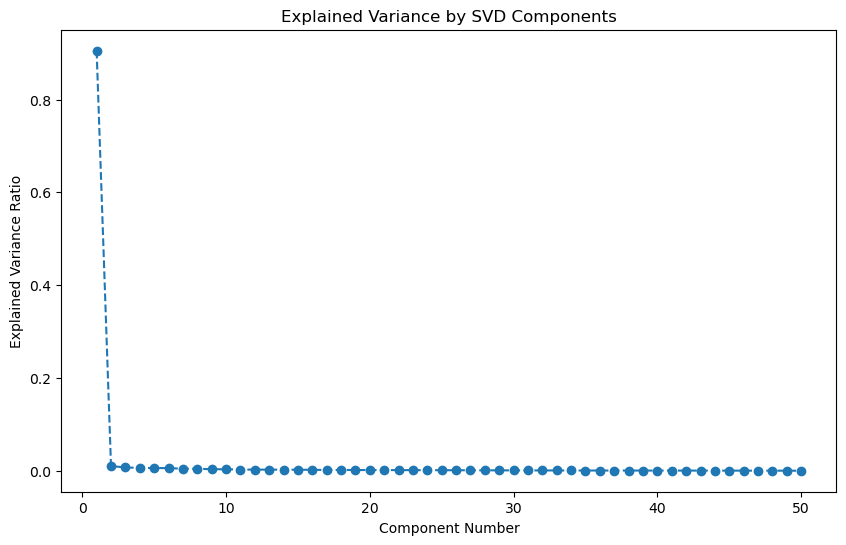

In [113]:
# Explained variance by each component
explained_variance = svd.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

print(f"Total Explained Variance with {n_components} components: {total_explained_variance:.2f}")

# Plotting the explained variance for each component
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by SVD Components')
plt.show()


## Latent Factors interpretation

In [116]:
# Extract latent factors for users and movies
user_latent_factors = svd.components_.T

# Display latent factors for a specific user
user_id = 1  # Example user ID
user_index = interaction_matrix.index.get_loc(user_id)
user_factors = X_svd[user_index]

print(f"Latent Factors for User ID {user_id}: {user_factors}")


Latent Factors for User ID 1: [ 6.15486557e+01 -1.95778572e+00 -1.79192360e+00 -2.52496181e+00
  4.00004729e+00 -1.91782597e+00  1.75198992e-01 -3.02704594e+00
 -1.46610957e-01 -2.14765734e+00 -2.35726888e+00  2.18896123e+00
 -4.30107843e+00 -5.18534653e+00  5.36571105e-02 -4.56608597e+00
 -9.23651003e+00 -1.29470373e+00  1.37626446e+01 -3.26423893e+00
  1.80955812e+01 -1.26951256e+01 -1.03629273e-01 -6.12142247e+00
  5.06934411e+00 -1.38068085e+00 -2.79255259e+00  1.71367679e+00
 -3.04434110e-01  2.08661354e+00  3.97038137e-01  1.77893500e+00
 -1.46741805e+00 -2.34232965e+00  3.82520859e-01 -6.79722669e-01
 -4.90125864e-01 -2.86737412e-01 -1.73931049e-01 -6.38755964e-01
  1.17836108e-01 -3.38675955e-01  3.94377302e-01 -3.09000895e-01
 -2.20434606e-01 -5.48793419e-01  2.77592809e-01 -2.47458167e-01
 -8.85603373e-02  3.21741472e-01]


# Reconstruction of Original Ratings

In [119]:
# Reconstruct the original matrix from the SVD components
reconstructed_matrix = svd.inverse_transform(X_svd)

# Convert the reconstructed matrix back to a DataFrame for comparison
reconstructed_df = pd.DataFrame(reconstructed_matrix, index=interaction_matrix.index, columns=interaction_matrix.columns[1:])

# Display the reconstructed ratings for a specific user
print(f"Reconstructed Ratings for User ID {user_id}:")
print(reconstructed_df.loc[user_id])


Reconstructed Ratings for User ID 1:
1                   5.134649e-15
2                  -1.269315e-14
3                   4.000000e+00
4                   1.312644e-14
5                   1.156976e-14
                        ...     
112852             -2.203617e-18
118696             -8.100001e-17
125916             -8.103872e-18
user_avg_rating     4.000000e+00
num_movies_rated    6.100000e+01
Name: 1, Length: 2092, dtype: float64


# Correlation Analysis

In [122]:
# Add latent factors to the user features for correlation analysis
latent_factors_df = pd.DataFrame(X_svd, index=interaction_matrix.index)
latent_factors_with_user_features = latent_factors_df.merge(user_features, left_index=True, right_on='userId')

# Calculate correlations between latent factors and user-specific features
correlations = latent_factors_with_user_features.corr()

print("Correlation between Latent Factors and User-Specific Features:")
print(correlations[['user_avg_rating', 'num_movies_rated']])


Correlation between Latent Factors and User-Specific Features:
                  user_avg_rating  num_movies_rated
0                        0.020289         -0.135190
1                        0.103741         -0.128085
2                       -0.240566          0.152870
3                        0.159997          0.063347
4                        0.087600          0.044311
5                        0.005938          0.087650
6                        0.226511         -0.054243
7                        0.252927          0.091021
8                        0.127073         -0.049483
9                        0.085358          0.116793
10                       0.085590         -0.187178
11                       0.112889         -0.025191
12                       0.208657          0.143734
13                      -0.114819          0.013087
14                       0.053302          0.344812
15                      -0.369129         -0.011021
16                      -0.015070         -0.019474
1